# Sprint 2 - Machine Learning e Redes Neurais

---

Integrantes:

95985 - Henrico Nardelli Bela<br>
95044 - Guilherme Antonio Silva<br>
96232 - Felype Nunes de Souza<br>
94341 - Rafael Pereira da Silva<br>
94660 - Lais Cristina Leme da Silva<br>

---

### To do!

Análise descritiva dos dados de NPS 

A partir das bases disponibilizadas pela BASF, desenvolver uma análise descritiva inicial para o problema, entregando um notebook com o pipeline implementado contendo: leitura dos dados, limpeza, exploração, visualização por meio de gráficos/tabelas, e análises críticas dos achados em comentários markdown. 


---

## Importar recursos

In [330]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

import warnings
warnings.filterwarnings('ignore')

Definindo algumas funções uteis

In [331]:
def rotulo(ax):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = 1
        label = format(y_value)
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords = "offset points", ha="center", va = "bottom")

## Ler DataSet

In [332]:
df = pd.read_excel(r"basf_nps2019.xlsx")
df

,Survey ID,Contact Country,Job Title,Contact Department,Sold to,Lead Contact OD,Main Industry,Customer Network,Local Invitation Date,Survey status,...,Product Quality,Delivery Reliability,Understanding your business needs,Alert type,Current status of alert,Local Rapid Response Sent Date,Due Date 20d,Local Alert Closed Date,What was the result of the follow-up conversation?,Outerloop Activity
0,2335847,Brazil,Analyst,R&D,394809,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
1,2335846,Brazil,Director,Others,394809,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
2,2335845,Brazil,Analyst,Supply Chain,1043002,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
3,2335844,Brazil,Manager,Others,2501948,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,COMPLETED,...,10.0,7.0,10.0,Passive,Reminded,2022-04-08 16:39:25.287,2022-05-05 11:34:58,NaT,NaN,NaN
4,2335843,Brazil,Manager,Supply Chain,1323633,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,COMPLETED,...,10.0,10.0,10.0,Promoter,Closed,2022-04-08 16:35:54.100,2022-05-05 15:04:18,2022-05-02 10:37:50.286,No issues,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39576,136716,Brazil,Manager,Management,1680070,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,COMPLETED,...,10.0,9.0,8.0,Promoter,Closed,2019-03-20 13:16:36.086,2019-04-16 21:54:25,2019-04-11 10:22:54.168,No issues,NaN
39577,136715,Brazil,Purchaser,Procurement,1680070,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,COMPLETED,...,9.0,8.0,8.0,Promoter,Closed,2019-03-20 13:11:09.971,2019-04-16 11:07:38,2019-04-11 10:26:07.302,No issues,NaN
39578,136714,Brazil,Manager,Management,1680070,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
39579,136713,Brazil,Manager,Management,2049754,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN


In [333]:
df.columns

Index(['Survey ID', 'Contact Country', 'Job Title', 'Contact Department',
       'Sold to', 'Lead Contact OD', 'Main Industry', 'Customer Network',
       'Local Invitation Date', 'Survey status', 'Local Response Date',
       'Likelihood to Recommend', 'Ease of doing business', 'Issue Resolution',
       'Product Quality', 'Delivery Reliability',
       'Understanding your business needs', 'Alert type',
       'Current status of alert', 'Local Rapid Response Sent Date',
       'Due Date 20d', 'Local Alert Closed Date',
       'What was the result of the follow-up conversation?',
       'Outerloop Activity'],
      dtype='object')

## Limpeza

Renomeando as colunas para melhor visualização

In [334]:
df = df.rename(columns = {"Survey ID": "id",
                         "Contact Country": "country",
                         "Job Title": "job",
                         "Contact Department": "department",
                         "Sold to": "sold",
                         "Lead Contact OD": "lead_OD",
                         "Main Industry": "industry",
                         "Customer Network": "network",
                         "Local Invitation Date": "local_inv_date",
                         "Survey status": "survey_stats",
                         "Local Response Date": "local_resp_date",
                         "Likelihood to Recommend": "like_recommend",
                         "Ease of doing business": "do_business",
                         "Issue Resolution": "issue_resolve",
                         "Product Quality": "product_quality",
                         "Delivery Reliability": "deliver_reliab",
                         "Understanding your business needs": "business_need",
                         "Alert type": "alert_type",
                         "Current status of alert": "curr_stats_alert",
                         "Local Rapid Response Sent Date": "local_sent_date",
                         "Due Date 20d": "date_20d",
                         "Local Alert Closed Date": "loc_alert_close_date",
                         "What was the result of the follow-up conversation?": "followup_result",
                         "Outerloop Activity": "outerloop"})

df.columns

Index(['id', 'country', 'job', 'department', 'sold', 'lead_OD', 'industry',
       'network', 'local_inv_date', 'survey_stats', 'local_resp_date',
       'like_recommend', 'do_business', 'issue_resolve', 'product_quality',
       'deliver_reliab', 'business_need', 'alert_type', 'curr_stats_alert',
       'local_sent_date', 'date_20d', 'loc_alert_close_date',
       'followup_result', 'outerloop'],
      dtype='object')

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39581 entries, 0 to 39580
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39581 non-null  int64         
 1   country               39581 non-null  object        
 2   job                   39560 non-null  object        
 3   department            39566 non-null  object        
 4   sold                  39581 non-null  object        
 5   lead_OD               39580 non-null  object        
 6   industry              38284 non-null  object        
 7   network               39581 non-null  object        
 8   local_inv_date        39581 non-null  datetime64[ns]
 9   survey_stats          39581 non-null  object        
 10  local_resp_date       12540 non-null  datetime64[ns]
 11  like_recommend        12901 non-null  float64       
 12  do_business           12415 non-null  float64       
 13  issue_resolve   

Contagem de nulos e NaN's

In [336]:
df.isna().sum()

id                          0
country                     0
job                        21
department                 15
sold                        0
lead_OD                     1
industry                 1297
network                     0
local_inv_date              0
survey_stats                0
local_resp_date         27041
like_recommend          26680
do_business             27166
issue_resolve           27099
product_quality         27094
deliver_reliab          27105
business_need           27114
alert_type              27041
curr_stats_alert        27041
local_sent_date         27211
date_20d                27041
loc_alert_close_date    27226
followup_result         27219
outerloop               37444
dtype: int64

In [337]:
df.isnull().sum()

id                          0
country                     0
job                        21
department                 15
sold                        0
lead_OD                     1
industry                 1297
network                     0
local_inv_date              0
survey_stats                0
local_resp_date         27041
like_recommend          26680
do_business             27166
issue_resolve           27099
product_quality         27094
deliver_reliab          27105
business_need           27114
alert_type              27041
curr_stats_alert        27041
local_sent_date         27211
date_20d                27041
loc_alert_close_date    27226
followup_result         27219
outerloop               37444
dtype: int64

Algumas amostras do dataset, head e tail

In [338]:
df.sample(10)

,id,country,job,department,sold,lead_OD,industry,network,local_inv_date,survey_stats,...,product_quality,deliver_reliab,business_need,alert_type,curr_stats_alert,local_sent_date,date_20d,loc_alert_close_date,followup_result,outerloop
23819,1030869,Brazil,Manager,R&D,1085856,EM - Care Chemicals,Chemicals & Plastics,No,2020-08-25 09:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
5273,2025836,Brazil,Supply Chain,Supply Chain,1214771,CI - Intermediates,Others,No,2021-10-19 10:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
37562,267290,Brazil,Manager,Management,3041979,CM - Monomers,Consumer Goods,No,2019-06-04 09:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
16230,1337512,Brazil,Manager,Marketing,582439,EM - Care Chemicals,Chemicals & Plastics,No,2021-03-16 10:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
2721,2099702,Brazil,Proprietário,Management,2754640,AP - Agricultural Solutions,Agriculture,No,2021-11-23 10:00:00,COMPLETED,...,8.0,10.0,10.0,Promoter,Closed,2021-12-09 10:00:26.016,2022-01-06 09:56:39,2021-12-09 10:01:16.838,No issues,NaN
14705,1360253,Colombia,Líder Línea De Protección De Cultivos,Marketing,A-0000611322,AP - Agricultural Solutions,Agriculture,No,2021-04-06 09:00:00,COMPLETED,...,9.0,8.0,6.0,Passive,Closed,2021-04-29 17:39:04.196,2021-05-27 10:54:42,2021-05-07 14:19:03.886,No issues,NaN
7981,1985733,Brazil,Analista,Others,1040286,ED - Dispersions & Pigments,Chemicals & Plastics,No,2021-09-28 10:00:00,COMPLETED,...,8.0,9.0,8.0,Promoter,Closed,2021-09-28 10:30:46.074,2021-10-26 10:21:30,2021-09-28 10:32:24.779,No issues,NaN
26211,927503,Colombia,Contadora,Others,971676,AP - Agricultural Solutions,Agriculture,No,2020-06-23 09:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
32528,551995,Brazil,Proprietário(a),Procurement,568548,EC - Coatings,Consumer Goods,No,2019-10-01 09:00:00,COMPLETED,...,10.0,10.0,10.0,Promoter,Closed,2019-10-04 11:39:18.497,2019-11-01 11:23:33,2019-10-04 11:39:53.060,No issues,NaN
7056,1988102,Brazil,Especialista P&D,R&D,67287,ED - Dispersions & Pigments,Consumer Goods,Yes,2021-09-28 10:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN


In [339]:
df.head(5)

,id,country,job,department,sold,lead_OD,industry,network,local_inv_date,survey_stats,...,product_quality,deliver_reliab,business_need,alert_type,curr_stats_alert,local_sent_date,date_20d,loc_alert_close_date,followup_result,outerloop
0,2335847,Brazil,Analyst,R&D,394809,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
1,2335846,Brazil,Director,Others,394809,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
2,2335845,Brazil,Analyst,Supply Chain,1043002,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
3,2335844,Brazil,Manager,Others,2501948,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,COMPLETED,...,10.0,7.0,10.0,Passive,Reminded,2022-04-08 16:39:25.287,2022-05-05 11:34:58,NaT,NaN,NaN
4,2335843,Brazil,Manager,Supply Chain,1323633,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,COMPLETED,...,10.0,10.0,10.0,Promoter,Closed,2022-04-08 16:35:54.100,2022-05-05 15:04:18,2022-05-02 10:37:50.286,No issues,NaN


In [340]:
df.tail(5)

,id,country,job,department,sold,lead_OD,industry,network,local_inv_date,survey_stats,...,product_quality,deliver_reliab,business_need,alert_type,curr_stats_alert,local_sent_date,date_20d,loc_alert_close_date,followup_result,outerloop
39576,136716,Brazil,Manager,Management,1680070,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,COMPLETED,...,10.0,9.0,8.0,Promoter,Closed,2019-03-20 13:16:36.086,2019-04-16 21:54:25,2019-04-11 10:22:54.168,No issues,NaN
39577,136715,Brazil,Purchaser,Procurement,1680070,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,COMPLETED,...,9.0,8.0,8.0,Promoter,Closed,2019-03-20 13:11:09.971,2019-04-16 11:07:38,2019-04-11 10:26:07.302,No issues,NaN
39578,136714,Brazil,Manager,Management,1680070,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
39579,136713,Brazil,Manager,Management,2049754,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
39580,136712,Brazil,Analyst,Supply Chain,472436,CM - Monomers,Others,No,2019-03-19 09:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN


Criando um novo dataset para teste, eliminando qualquer coluna que tenha valores nulos e NaN's

In [341]:
df2 = df.dropna(how = "any")
df2

,id,country,job,department,sold,lead_OD,industry,network,local_inv_date,survey_stats,...,product_quality,deliver_reliab,business_need,alert_type,curr_stats_alert,local_sent_date,date_20d,loc_alert_close_date,followup_result,outerloop
142,2335585,Brazil,Supervisor Agrícola,Production,1940324,AP - Agricultural Solutions,Agriculture,No,2022-04-05 10:00:00,COMPLETED,...,9.0,5.0,8.0,Detractor,Closed,2022-04-06 10:05:38.782,2022-05-03 13:35:07,2022-04-25 18:27:48.531,Issue(s) identified and unresolved,Open
198,2335490,Brazil,Planning Analyst,Supply Chain,3328191,EV - Performance Chemicals,Energy & Resources,No,2022-04-05 10:00:00,COMPLETED,...,10.0,7.0,10.0,Passive,Closed,2022-04-19 14:25:52.372,2022-05-17 10:15:01,2022-04-19 14:27:39.822,Issue(s) identified and unresolved,Open
399,2335151,Brazil,Diretor(a),Management,1032333,EC - Coatings,Consumer Goods,No,2022-04-05 10:00:00,COMPLETED,...,8.0,6.0,8.0,Passive,Closed,2022-04-19 21:43:13.939,2022-05-17 13:38:31,2022-05-01 15:52:26.726,Issue(s) identified and unresolved,Open
421,2335116,Brazil,Sócio(a),Management,1048149,EC - Coatings,Consumer Goods,No,2022-04-05 10:00:00,COMPLETED,...,10.0,9.0,5.0,Promoter,Closed,2022-04-11 14:07:56.294,2022-05-09 12:05:27,2022-04-27 20:10:01.933,Issue(s) identified and unresolved,Open
438,2335077,Brazil,Gerente De Unidade De Produção,Production,1032423,AP - Agricultural Solutions,Agriculture,No,2022-04-05 10:00:00,COMPLETED,...,9.0,9.0,9.0,Promoter,Closed,2022-04-06 09:57:51.231,2022-05-03 12:53:13,2022-04-25 18:45:26.906,Issue(s) identified and unresolved,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39453,136839,Brazil,Coordinator,Procurement,1230248,EM - Care Chemicals,Consumer Goods,No,2019-03-19 09:00:00,COMPLETED,...,8.0,5.0,9.0,Passive,Closed,2019-04-03 15:12:25.873,2019-04-30 09:38:21,2019-04-24 20:53:03.411,Issue(s) identified and unresolved,Open
39459,136833,Brazil,Engenheiro Metalurgista,Production,943010,EV - Performance Chemicals,Energy & Resources,No,2019-03-19 09:00:00,COMPLETED,...,9.0,8.0,5.0,Passive,Closed,2019-04-22 10:41:30.822,2019-05-20 09:27:31,2019-05-16 10:39:31.777,Issue(s) identified and unresolved,Open
39541,136751,Brazil,Mkt,Marketing,1124527,CP - Petrochemicals,Others,No,2019-03-19 09:00:00,COMPLETED,...,10.0,6.0,7.0,Promoter,Closed,2019-04-05 16:36:17.593,2019-05-03 08:59:30,2019-04-05 17:05:34.263,Issue(s) identified and unresolved,Open
39542,136750,Brazil,Buyer,Procurement,1124527,CP - Petrochemicals,Others,No,2019-03-19 09:00:00,COMPLETED,...,10.0,4.0,6.0,Promoter,Closed,2019-04-05 16:26:11.262,2019-05-02 17:31:09,2019-04-05 16:57:46.406,Issue(s) identified and unresolved,Open


In [342]:
df

,id,country,job,department,sold,lead_OD,industry,network,local_inv_date,survey_stats,...,product_quality,deliver_reliab,business_need,alert_type,curr_stats_alert,local_sent_date,date_20d,loc_alert_close_date,followup_result,outerloop
0,2335847,Brazil,Analyst,R&D,394809,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
1,2335846,Brazil,Director,Others,394809,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
2,2335845,Brazil,Analyst,Supply Chain,1043002,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
3,2335844,Brazil,Manager,Others,2501948,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,COMPLETED,...,10.0,7.0,10.0,Passive,Reminded,2022-04-08 16:39:25.287,2022-05-05 11:34:58,NaT,NaN,NaN
4,2335843,Brazil,Manager,Supply Chain,1323633,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,COMPLETED,...,10.0,10.0,10.0,Promoter,Closed,2022-04-08 16:35:54.100,2022-05-05 15:04:18,2022-05-02 10:37:50.286,No issues,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39576,136716,Brazil,Manager,Management,1680070,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,COMPLETED,...,10.0,9.0,8.0,Promoter,Closed,2019-03-20 13:16:36.086,2019-04-16 21:54:25,2019-04-11 10:22:54.168,No issues,NaN
39577,136715,Brazil,Purchaser,Procurement,1680070,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,COMPLETED,...,9.0,8.0,8.0,Promoter,Closed,2019-03-20 13:11:09.971,2019-04-16 11:07:38,2019-04-11 10:26:07.302,No issues,NaN
39578,136714,Brazil,Manager,Management,1680070,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN
39579,136713,Brazil,Manager,Management,2049754,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,DELIVERED_AND_REMINDED,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN


Preenchendo as colunas do dataset (df) com a moda de cada coluna, a instrução faz uma verificação se a moda for NaN, do contrario ela preenche.

In [343]:
for coluna in df.columns:
    
    na_count = df[coluna].isna().value_counts()
    
    moda = statistics.mode(df[coluna])
    
    if df[coluna].dtype == "float64":
        if moda == "NaN":
            if na_count == True:
                pass
        else: 
            df[coluna] = df[coluna].fillna(value = moda)
        
    if df[coluna].dtype == "int64":
        if moda == "NaN":
            if na_count == True:
                pass
        else: 
            df[coluna] = df[coluna].fillna(value = moda)
            
    if df[coluna].dtype == "O":
        if moda == "NaN":
            if na_count == True:
                pass
        else: 
            df[coluna] = df[coluna].fillna(value = moda)


In [344]:
df

,id,country,job,department,sold,lead_OD,industry,network,local_inv_date,survey_stats,...,product_quality,deliver_reliab,business_need,alert_type,curr_stats_alert,local_sent_date,date_20d,loc_alert_close_date,followup_result,outerloop
0,2335847,Brazil,Analyst,R&D,394809,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,DELIVERED_AND_REMINDED,...,10.0,10.0,10.0,NaN,NaN,NaT,NaT,NaT,NaN,NaN
1,2335846,Brazil,Director,Others,394809,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,DELIVERED_AND_REMINDED,...,10.0,10.0,10.0,NaN,NaN,NaT,NaT,NaT,NaN,NaN
2,2335845,Brazil,Analyst,Supply Chain,1043002,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,DELIVERED_AND_REMINDED,...,10.0,10.0,10.0,NaN,NaN,NaT,NaT,NaT,NaN,NaN
3,2335844,Brazil,Manager,Others,2501948,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,COMPLETED,...,10.0,7.0,10.0,Passive,Reminded,2022-04-08 16:39:25.287,2022-05-05 11:34:58,NaT,NaN,NaN
4,2335843,Brazil,Manager,Supply Chain,1323633,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,COMPLETED,...,10.0,10.0,10.0,Promoter,Closed,2022-04-08 16:35:54.100,2022-05-05 15:04:18,2022-05-02 10:37:50.286,No issues,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39576,136716,Brazil,Manager,Management,1680070,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,COMPLETED,...,10.0,9.0,8.0,Promoter,Closed,2019-03-20 13:16:36.086,2019-04-16 21:54:25,2019-04-11 10:22:54.168,No issues,NaN
39577,136715,Brazil,Purchaser,Procurement,1680070,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,COMPLETED,...,9.0,8.0,8.0,Promoter,Closed,2019-03-20 13:11:09.971,2019-04-16 11:07:38,2019-04-11 10:26:07.302,No issues,NaN
39578,136714,Brazil,Manager,Management,1680070,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,DELIVERED_AND_REMINDED,...,10.0,10.0,10.0,NaN,NaN,NaT,NaT,NaT,NaN,NaN
39579,136713,Brazil,Manager,Management,2049754,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,DELIVERED_AND_REMINDED,...,10.0,10.0,10.0,NaN,NaN,NaT,NaT,NaT,NaN,NaN


Somando novamente para verificar se há valores nulos

In [345]:
df.isna().sum()

id                          0
country                     0
job                         0
department                  0
sold                        0
lead_OD                     0
industry                    0
network                     0
local_inv_date              0
survey_stats                0
local_resp_date         27041
like_recommend              0
do_business                 0
issue_resolve               0
product_quality             0
deliver_reliab              0
business_need               0
alert_type              27041
curr_stats_alert        27041
local_sent_date         27211
date_20d                27041
loc_alert_close_date    27226
followup_result         27219
outerloop               37444
dtype: int64

Identificamos que a coluna Outerloop não é necessaria e a eliminamos

In [346]:
df = df.drop(columns = ["outerloop"])

Limpeza dos NaN's e nulos restantes

In [347]:
df = df.dropna(how = "any")
df

,id,country,job,department,sold,lead_OD,industry,network,local_inv_date,survey_stats,...,issue_resolve,product_quality,deliver_reliab,business_need,alert_type,curr_stats_alert,local_sent_date,date_20d,loc_alert_close_date,followup_result
4,2335843,Brazil,Manager,Supply Chain,1323633,CM - Monomers,Chemicals & Plastics,No,2022-04-05 10:00:00,COMPLETED,...,10.0,10.0,10.0,10.0,Promoter,Closed,2022-04-08 16:35:54.100,2022-05-05 15:04:18,2022-05-02 10:37:50.286,No issues
24,2335760,Brazil,Coordinator,Supply Chain,1124527,EM - Care Chemicals,Others,No,2022-04-05 10:00:00,COMPLETED,...,10.0,10.0,7.0,8.0,Promoter,Closed,2022-04-12 17:51:35.515,2022-05-10 17:36:58,2022-04-12 17:53:46.305,Issue(s) identified and resolved
27,2335755,Brazil,Gerente,Procurement,594015,EC - Coatings,Consumer Goods,No,2022-04-05 10:00:00,COMPLETED,...,10.0,10.0,10.0,10.0,Promoter,Closed,2022-04-18 17:50:41.396,2022-05-16 17:20:50,2022-04-25 08:28:09.465,No issues
29,2335752,Brazil,Compradora,Procurement,1044874,EC - Coatings,Consumer Goods,No,2022-04-05 10:00:00,COMPLETED,...,10.0,10.0,10.0,9.0,Promoter,Closed,2022-04-06 15:24:45.624,2022-05-04 12:02:18,2022-04-14 08:33:41.263,Issue(s) identified and resolved
33,2335746,Brazil,Planejador De Produção,Production,1789930,ED - Dispersions & Pigments,Chemicals & Plastics,No,2022-04-05 10:00:00,COMPLETED,...,10.0,10.0,10.0,10.0,Promoter,Closed,2022-04-06 09:22:09.132,2022-05-03 10:31:48,2022-04-06 09:23:01.039,No issues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39567,136725,Brazil,Analyst,Supply Chain,2501854,CM - Monomers,Chemicals & Plastics,No,2019-03-19 09:00:00,COMPLETED,...,9.0,10.0,10.0,10.0,Promoter,Closed,2019-04-02 15:44:17.525,2019-04-30 14:43:18,2019-04-04 17:18:08.398,No issues
39568,136724,Brazil,Manager,Procurement,921700,CM - Monomers,Energy & Resources,No,2019-03-19 09:00:00,COMPLETED,...,9.0,10.0,9.0,9.0,Promoter,Closed,2019-03-26 16:20:41.753,2019-04-22 14:04:20,2019-03-26 19:16:53.101,No issues
39571,136721,Brazil,Analyst,R&D,1568982,CM - Monomers,Others,No,2019-03-19 09:00:00,COMPLETED,...,9.0,10.0,9.0,9.0,Promoter,Closed,2019-03-19 15:50:02.915,2019-04-16 09:08:09,2021-09-23 15:06:24.412,Issue(s) identified and unresolved
39576,136716,Brazil,Manager,Management,1680070,CM - Monomers,Consumer Goods,No,2019-03-19 09:00:00,COMPLETED,...,9.0,10.0,9.0,8.0,Promoter,Closed,2019-03-20 13:16:36.086,2019-04-16 21:54:25,2019-04-11 10:22:54.168,No issues


Nova verificação para nulos e NaN's

In [348]:
df.isna().sum()

id                      0
country                 0
job                     0
department              0
sold                    0
lead_OD                 0
industry                0
network                 0
local_inv_date          0
survey_stats            0
local_resp_date         0
like_recommend          0
do_business             0
issue_resolve           0
product_quality         0
deliver_reliab          0
business_need           0
alert_type              0
curr_stats_alert        0
local_sent_date         0
date_20d                0
loc_alert_close_date    0
followup_result         0
dtype: int64

Verificando o tamanho do df limpo

In [349]:
df.shape

(12196, 23)

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12196 entries, 4 to 39577
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    12196 non-null  int64         
 1   country               12196 non-null  object        
 2   job                   12196 non-null  object        
 3   department            12196 non-null  object        
 4   sold                  12196 non-null  object        
 5   lead_OD               12196 non-null  object        
 6   industry              12196 non-null  object        
 7   network               12196 non-null  object        
 8   local_inv_date        12196 non-null  datetime64[ns]
 9   survey_stats          12196 non-null  object        
 10  local_resp_date       12196 non-null  datetime64[ns]
 11  like_recommend        12196 non-null  float64       
 12  do_business           12196 non-null  float64       
 13  issue_resolve   

Removendo colunas desnecessárias

In [351]:
df = df.drop(columns = ["id","local_inv_date", "local_resp_date", "local_sent_date", "date_20d", "loc_alert_close_date"])

In [352]:
df

,country,job,department,sold,lead_OD,industry,network,survey_stats,like_recommend,do_business,issue_resolve,product_quality,deliver_reliab,business_need,alert_type,curr_stats_alert,followup_result
4,Brazil,Manager,Supply Chain,1323633,CM - Monomers,Chemicals & Plastics,No,COMPLETED,10.0,10.0,10.0,10.0,10.0,10.0,Promoter,Closed,No issues
24,Brazil,Coordinator,Supply Chain,1124527,EM - Care Chemicals,Others,No,COMPLETED,10.0,8.0,10.0,10.0,7.0,8.0,Promoter,Closed,Issue(s) identified and resolved
27,Brazil,Gerente,Procurement,594015,EC - Coatings,Consumer Goods,No,COMPLETED,10.0,10.0,10.0,10.0,10.0,10.0,Promoter,Closed,No issues
29,Brazil,Compradora,Procurement,1044874,EC - Coatings,Consumer Goods,No,COMPLETED,10.0,10.0,10.0,10.0,10.0,9.0,Promoter,Closed,Issue(s) identified and resolved
33,Brazil,Planejador De Produção,Production,1789930,ED - Dispersions & Pigments,Chemicals & Plastics,No,COMPLETED,10.0,10.0,10.0,10.0,10.0,10.0,Promoter,Closed,No issues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39567,Brazil,Analyst,Supply Chain,2501854,CM - Monomers,Chemicals & Plastics,No,COMPLETED,9.0,10.0,9.0,10.0,10.0,10.0,Promoter,Closed,No issues
39568,Brazil,Manager,Procurement,921700,CM - Monomers,Energy & Resources,No,COMPLETED,9.0,9.0,9.0,10.0,9.0,9.0,Promoter,Closed,No issues
39571,Brazil,Analyst,R&D,1568982,CM - Monomers,Others,No,COMPLETED,10.0,9.0,9.0,10.0,9.0,9.0,Promoter,Closed,Issue(s) identified and unresolved
39576,Brazil,Manager,Management,1680070,CM - Monomers,Consumer Goods,No,COMPLETED,10.0,8.0,9.0,10.0,9.0,8.0,Promoter,Closed,No issues


Contando os valores de cada coluna para a plotagem mais precisa dos graficos.

In [353]:
for coluna in df.columns:
    count = df[coluna].value_counts()
    print(f"Coluna: {coluna}\n\nContagens:\n{count}\n\n\n\n")

Coluna: country

Contagens:
Brazil                               7882
Argentina                            1316
Colombia                              825
Chile                                 696
Mexico                                521
Peru                                  363
Ecuador                               182
Uruguay                                85
Bolivia                                60
Guatemala                              52
Costa Rica                             45
Dominican Republic                     41
Paraguay                               40
Panama                                 22
Nicaragua                              18
Honduras                               16
El Salvador                            13
Venezuela, Bolivarian Republic of       7
Trinidad and Tobago                     4
Belize                                  3
USA                                     2
Ghana                                   2
Guyana                                  1
Name: 

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12196 entries, 4 to 39577
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           12196 non-null  object 
 1   job               12196 non-null  object 
 2   department        12196 non-null  object 
 3   sold              12196 non-null  object 
 4   lead_OD           12196 non-null  object 
 5   industry          12196 non-null  object 
 6   network           12196 non-null  object 
 7   survey_stats      12196 non-null  object 
 8   like_recommend    12196 non-null  float64
 9   do_business       12196 non-null  float64
 10  issue_resolve     12196 non-null  float64
 11  product_quality   12196 non-null  float64
 12  deliver_reliab    12196 non-null  float64
 13  business_need     12196 non-null  float64
 14  alert_type        12196 non-null  object 
 15  curr_stats_alert  12196 non-null  object 
 16  followup_result   12196 non-null  object

Contando os valores de cada coluna para a plotagem mais precisa dos graficos, e comparar com o primeiro dataset

In [355]:
for coluna in df2.columns:
    count = df2[coluna].value_counts()
    print(f"Coluna: {coluna}\n\nContagens:\n{count}\n\n\n\n")

Coluna: id

Contagens:
2335585    1
625424     1
598948     1
597793     1
598279     1
          ..
1340405    1
1340431    1
1340462    1
1340600    1
136721     1
Name: id, Length: 1985, dtype: int64




Coluna: country

Contagens:
Brazil                               1075
Argentina                             275
Chile                                 147
Colombia                              145
Mexico                                134
Peru                                   75
Ecuador                                54
Dominican Republic                     18
Uruguay                                16
Panama                                 10
Bolivia                                 9
Costa Rica                              6
Paraguay                                6
Guatemala                               5
Honduras                                2
El Salvador                             2
Nicaragua                               2
Venezuela, Bolivarian Republic of       2
Guyana   

In [356]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 142 to 39571
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1985 non-null   int64         
 1   country               1985 non-null   object        
 2   job                   1985 non-null   object        
 3   department            1985 non-null   object        
 4   sold                  1985 non-null   object        
 5   lead_OD               1985 non-null   object        
 6   industry              1985 non-null   object        
 7   network               1985 non-null   object        
 8   local_inv_date        1985 non-null   datetime64[ns]
 9   survey_stats          1985 non-null   object        
 10  local_resp_date       1985 non-null   datetime64[ns]
 11  like_recommend        1985 non-null   float64       
 12  do_business           1985 non-null   float64       
 13  issue_resolve  

Após a analise de ambos os data sets limpos, podemos identificar que o melhor data set a ser utilizado para a plotagem dos graficos é o "df" pois nele as informações se apresentam mais consistentes e as linhas nulas que foram preenchidas não sumiram depois da limpeza, como aconteceu com o dataset df2.

## Plots

Começando com um countplot de alert_type

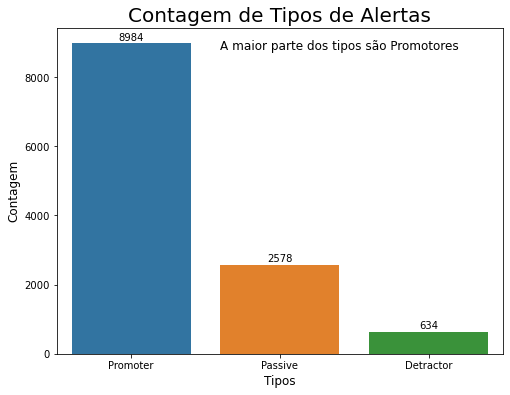

In [357]:
plt.figure(figsize = (8, 6))

ax = sns.countplot(x = df["alert_type"], data = df)

plt.title("Contagem de Tipos de Alertas", fontsize = 20)
plt.xlabel("Tipos", fontsize = 12)
plt.ylabel("Contagem", fontsize = 12)
ax.text(0.60, 8800, "A maior parte dos tipos são Promotores",
       fontsize = 12)

rotulo(ax)

plt.show()

Passando para contagem de followup_result

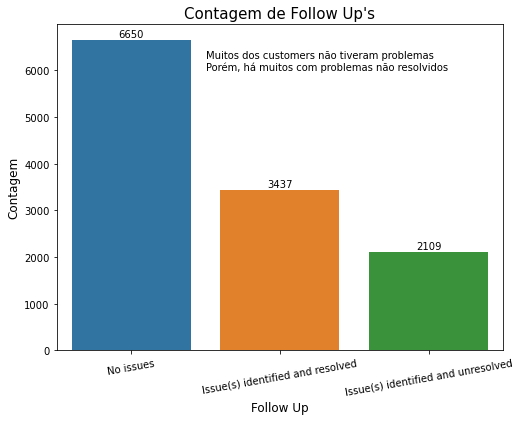

In [358]:
plt.figure(figsize = (8, 6))

ax = sns.countplot(x = df["followup_result"], data = df)

plt.title("Contagem de Follow Up's", fontsize = 15)
plt.xlabel("Follow Up", fontsize = 12)
plt.xticks(rotation = 10)
plt.ylabel("Contagem", fontsize = 12)
ax.text(0.50, 6000, "Muitos dos customers não tiveram problemas\nPorém, há muitos com problemas não resolvidos",
       fontsize = 10)

rotulo(ax)

plt.show()

Agora para Lead OD mais famosos

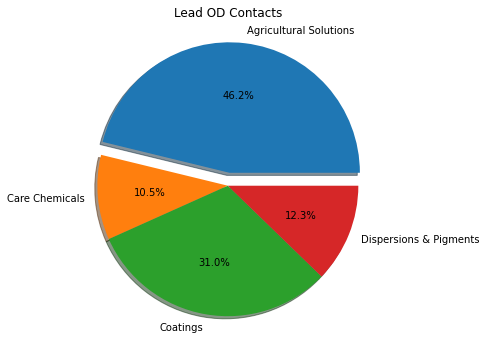

In [359]:
ap = df[df["lead_OD"] == "AP - Agricultural Solutions"].shape[0]
em = df[df["lead_OD"] == "EM - Care Chemicals"].shape[0]
ec = df[df["lead_OD"] == "EC - Coatings"].shape[0]
ed = df[df["lead_OD"] == "ED - Dispersions & Pigments"].shape[0]                 

plt.figure(figsize = (8, 6))
explode = (0.1, 0, 0, 0)

plt.pie([ap, em, ec, ed], labels=["Agricultural Solutions", "Care Chemicals", "Coatings", "Dispersions & Pigments"],
        autopct='%1.1f%%',
        shadow = True,
        explode = explode)

plt.title("Lead OD Contacts")

plt.show()

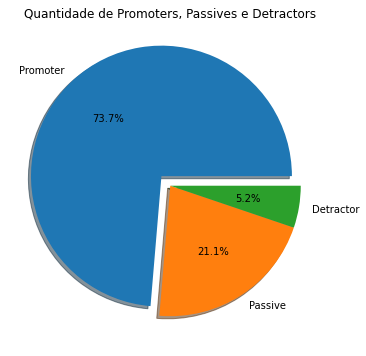

In [360]:
promoter = df[df["alert_type"] == "Promoter"].shape[0]
passive = df[df["alert_type"] == "Passive"].shape[0]
detractor = df[df["alert_type"] == "Detractor"].shape[0]
             
plt.figure(figsize = (8, 6))
explode = (0.1, 0, 0)

plt.pie([promoter, passive, detractor], labels=["Promoter", "Passive", "Detractor"],
        autopct='%1.1f%%',
        shadow = True,
        explode = explode)

plt.title("Quantidade de Promoters, Passives e Detractors")

plt.show()

like_recommend x alert_type

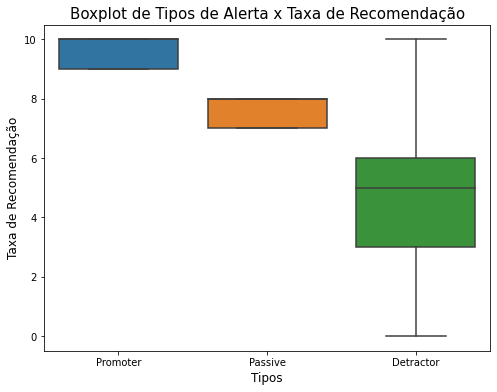

In [361]:
plt.figure(figsize = (8, 6))

job = df["like_recommend"]
alert = df["alert_type"]

sns.boxplot(x = alert, y = job, data = df)
plt.title("Boxplot de Tipos de Alerta x Taxa de Recomendação", fontsize = 15)
plt.xlabel("Tipos", fontsize = 12)
plt.ylabel("Taxa de Recomendação", fontsize = 12)

plt.show()

alert_type x country

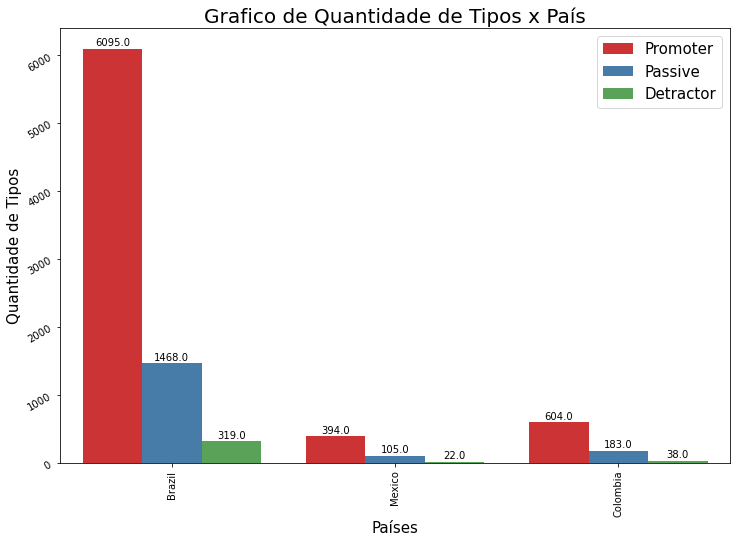

In [362]:
plt.figure(figsize = (12, 8))

country = df["country"]

alert = df["alert_type"]

ax = sns.countplot(x = country, hue = alert, data = df, palette = "Set1")

plt.title("Grafico de Quantidade de Tipos x País", fontsize = 20)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10, rotation = 30)
plt.xlabel("Países", fontsize = 15)
plt.ylabel("Quantidade de Tipos", fontsize = 15)
ax.legend(loc = "upper right", fontsize = 15)
plt.xlim(-0.5,2.5)

rotulo(ax)

plt.show()

Correlação de Features não categoricas

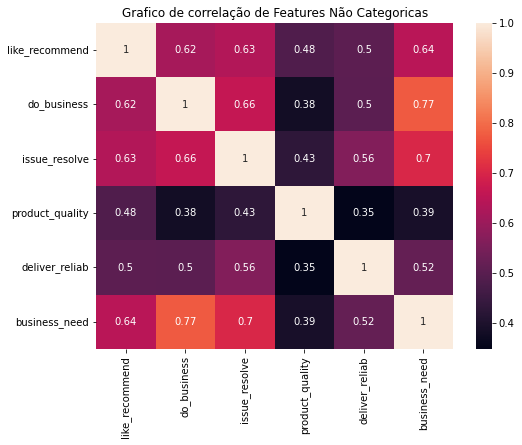

In [363]:
plt.figure(figsize = (8, 6))

sns.heatmap(df.corr(), annot = True)

plt.title("Grafico de correlação de Features Não Categoricas")

plt.show()

Pairplot total do df, visualizando o tipo de alerta

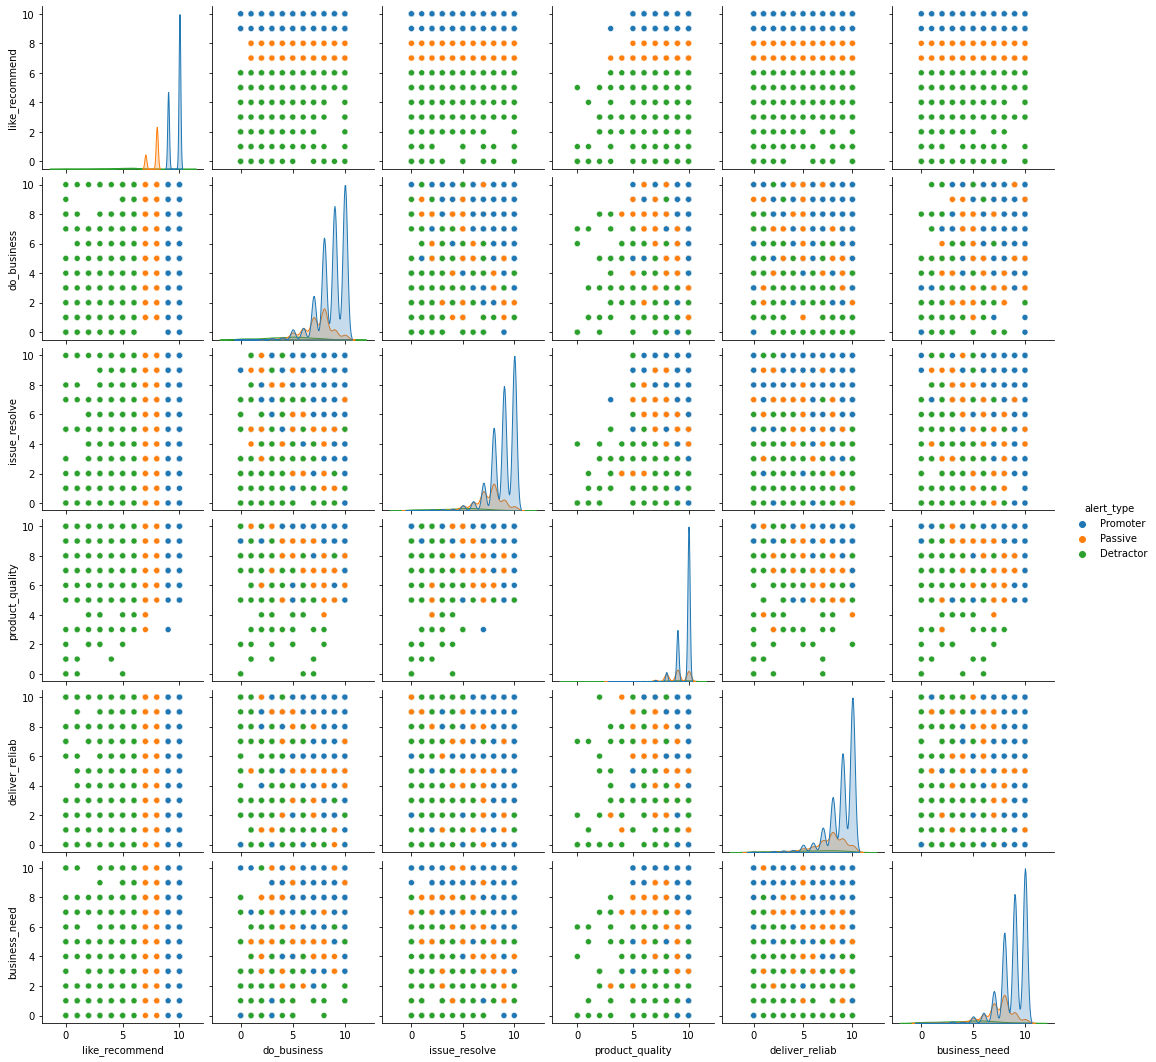

In [364]:
sns.pairplot(df, hue="alert_type")
plt.show()

### Conclusão e Analise Crítica

Após analises realizadas, podemos identificar que o Brasil tem a maior quantidade de Promoters, porém, o Brasil tambem conta com a maior quantidade de Detractors. 

Existem cerca de 75% de Promoters a mais do que Detractors e Passives. 

As soluções de Agricultura se sobresaem dentre as outras Lead OD's.

Podemos identificar támbem, que o dataset necessitou de uma limpeza pesada para reagir bem aos graficos, os datasets secundários criados para suporte, não performaram tão bem quanto imaginavamos. Decidimos por deixar apenas o dataset primário com todos os dados faltantes preenchidos.

De acordo com o grafico de quantidade de promoters, detractors e passives, podemos identificar que as metricas da BASF de NPS se concentram em:

73.7% Promoter

21.1% Passive

5.2% Detractor